<a href="https://colab.research.google.com/github/Harshith-R-shetty/AyurVision/blob/Likhith-18-rag-chatbot/Prakriti_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/kaggle/input/prakriti-dataset/data.csv')
dataset = dataset.drop('SampleIdx', axis=1)
dataset.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha


In [4]:
def print_unique_values():
    for column in dataset:
        print(f'{column}:\t\t {dataset[column].unique()}')
print_unique_values()

Gender:		 ['Male' 'Female']
bodyBuild_Size:		 ['Weaklydeveloped' 'Welldeveloped' 'Moderatelydeveloped']
bodyFrame_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
bodyFrame_Length:		 ['Long' 'Medium' 'Tooshort/Toolong' nan]
bodyHair_Color:		 ['Black' 'DarkBrown' 'LightBrown' 'Dusky' nan]
chest_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
eye_Color:		 ['DarkBrown' 'LightBrown' 'Black' 'Grayish']
eye_Size:		 ['Moderatelydeveloped' 'Weaklydeveloped' 'Welldeveloped']
eye_Symmetry:		 ['Proportionate' 'Disproportionate']
eyebrow_Size:		 ['Medium' 'Large' 'Small' nan]
eyelash_Size:		 ['Small' 'Medium' 'Large']
face_Size:		 ['Moderatelydeveloped' 'Welldeveloped' 'Weaklydeveloped']
forehead_Breadth:		 ['Medium' 'Broad' 'Thin/Narrow' nan]
forehead_Length:		 ['Medium' 'Long' 'Tooshort/Toolong' nan]
hair_Growth:		 ['Moderate' 'Scanty' nan 'Dense']
hair_Nature:		 ['Normal' 'Seasonal/Variable' 'Dry' nan 'Oily']
hair_Type:		 ['Thin' 'Thick']
hands_Length:		 ['Long' 'Medium' 'Tooshort/Toolong']
joint_Size:	

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = dataset.apply(le.fit_transform)

data_encoded.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,1,1,2,0,0,2,1,0,1,1,...,1,1,0,1,1,1,1,1,0,2
1,1,2,0,0,1,0,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2,1,1,2,0,3,2,3,1,1,0,...,1,1,1,0,1,1,0,1,1,2
3,1,1,2,0,2,2,1,1,1,1,...,1,1,0,0,1,1,1,0,1,2
4,1,2,0,0,0,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,0


In [6]:
X=data_encoded.iloc[:,:-1].values
y=data_encoded.iloc[:,-1].values

print(X.shape)

(147, 133)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

model = Sequential([
    Dense(133, input_shape=(133,),activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.0761 - accuracy: 0.4510
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.7549
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.8725
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.9118
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.9608
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.9804
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.9608
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9706
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1150 - accuracy: 0.9902
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9902
Epoch 11/20
4/4 [======================

In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2612 - accuracy: 0.9556


[0.2611682116985321, 0.9555555582046509]

In [19]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 5ms/step


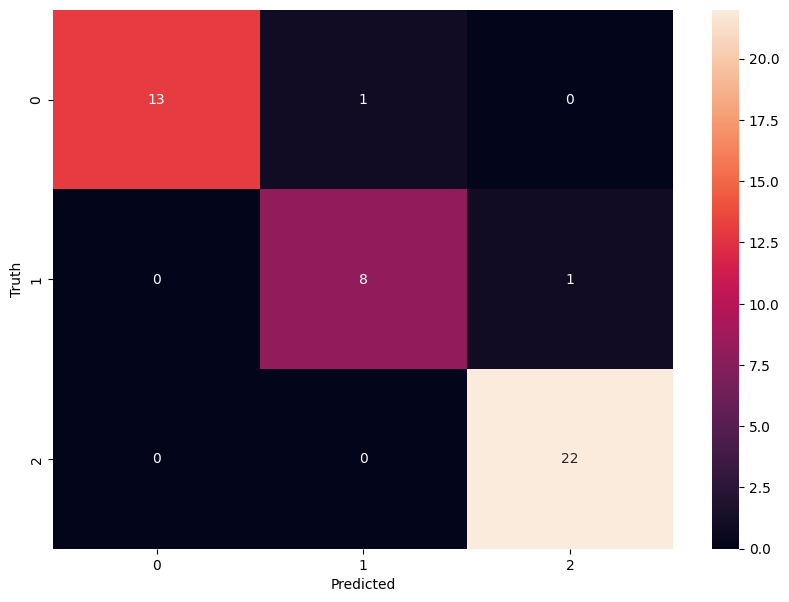

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()